# Comparing the Power Levels of Beams

At this stage, I would like to compare the powers of the different beams. I am doing this for several reasons. For the hits that were observed in two beams, I want to see how the powers compare to each other and to some of the powers in the other incoherent beams. To compare them to each other, to see how those intensities compare with their spacing on the plane of the sky. Given the point spread function, they should have some variance, unless by some crazy miracle the signal is coming from directly in between the two beams. 

Then for the rest of the types of hits, I plan on comparing the intensities of the incoherent beam with the powers of the coherent beams. Because of how the coherent beams are made, they should a minimum of 4.4 times greater than the incoherent power. This is because there were 20-24 antennae fully in use during these observations and the incoherent power should be greater than the the square root of the number of antennae times the coherent power. I will also compare the powers of the coherent beams with the other coherent beams in that same field of view (where applicable) to try to triangulate the exact location of the source emitting the signal. 

But first, I'll load in the packages that I'll need for this. Check the README.md to see the versions for each package that I am using.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from tabulate import tabulate
from astropy.time import Time
from tqdm import tqdm
import csv
import math

Load in all of the files that I will need to use. Most of these are the ones that have an incoherent beam included in each of the hits and have a maximum spacing of 3 beams for a total maximum spacing of 6.3". The two exceptions are all of the hits in 2 beams. The one with the separation is the file that has all of the hits in 2 beams and neither of these are the incoherent beam. There is an additional requirement for this file that all of the beams are within 6.3" of each other. The other file for the hits that are detected in two of the beams is the one where one beam is the incoherent and the other is a coherent beam.

In [3]:
with open('../../Pickle_Files/beam_separation_2_hits.pkl', 'rb') as f:
    hit_2 = pickle.load(f)
print(hit_2.shape)
file_path_2 = hit_2["file_path"]
unique_file_path_2 = np.unique(file_path_2) #the array of unique fields of view

with open('../../Pickle_Files/beam_separation_3_hits.pkl', 'rb') as f:
    hit_3 = pickle.load(f)
print(hit_3.shape)
file_path_3 = hit_3["file_path"]
unique_file_path_3 = np.unique(file_path_3) #the array of unique fields of view

with open('../../Pickle_Files/beam_separation_4_hits.pkl', 'rb') as f:
    hit_4 = pickle.load(f)
print(hit_4.shape)
file_path_4 = hit_4["file_path"]
unique_file_path_4 = np.unique(file_path_4) #the array of unique fields of view

with open('../../Pickle_Files/beam_separation_5_hits.pkl', 'rb') as f:
    hit_5 = pickle.load(f)
print(hit_5.shape)
file_path_5 = hit_5["file_path"]
unique_file_path_5 = np.unique(file_path_5) #the array of unique fields of view

with open('../../Pickle_Files/2_beams.pkl', 'rb') as f:
    hit_2_incoherent = pickle.load(f)
print(hit_2_incoherent.shape)
file_path_2_incoherent = hit_2_incoherent["file_path"]
unique_file_path_2_incoherent = np.unique(file_path_2_incoherent) #the array of unique fields of view

(37328, 24)
(25734, 24)
(31544, 24)
(87350, 24)
(26142, 24)


This first cell will look at the hits with just the power levels for the hits that were present in one coherent beam and an incoherent beam. I am comparing the powers of the coherent beam and the incoherent beam. In the cases where the incoherent powers are different between the coherent and incoherent beams, I used the incoherent power from the incoherent beam.

In [56]:
df2 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

power_ratios_2_incoherent = []
for i in tqdm(range(int(len(file_path_2_incoherent)/2))):
#for i in range(100):
    data_fov_subset = hit_2_incoherent.loc[i*2:(i*2)+1] #select each subset  
    
    #All of the hits within a given clump will all have the same frequency, so I am sorting only by the signal power
    data_fov_subset = data_fov_subset.sort_values(by = ["beam"])

    incoherent_power = np.unique(np.array(data_fov_subset["signal_incoherentPower"])) #define the column 
    coherent_power = np.array(data_fov_subset["signal_power"])
    
    if len(incoherent_power) == 1:
        power_ratio = coherent_power[0]/incoherent_power[-1]

        if coherent_power[0]*4.4 > incoherent_power[-1]:
            power_ratios_2_incoherent.append(power_ratio)

            appending_rows = data_fov_subset
            df2 = df2.append(appending_rows, ignore_index = True)        

        else:
            continue
            
    else:
        continue

print(np.max(power_ratios_2_incoherent), np.min(power_ratios_2_incoherent), len(power_ratios_2_incoherent))
print(df2.shape)

with open('../../Pickle_Files/short_list_2_hits.pkl', 'wb') as f:  # open a text file
    pickle.dump(df2, f) # serialize the list
f.close()

100%|██████████| 13071/13071 [00:17<00:00, 728.03it/s]

1.3593550060659945 0.8232252130113559 10133
(20266, 24)


This is comparing the power of the coherent and incoherent beams for the hits that were detected in 5 beams. Again, if the incoherent power was different across the different hits in the coherent and incoherent beams, they were omitted.

In [61]:
df2 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

power_ratios_5 = []
for i in tqdm(range(int(len(file_path_5)/5))):
    data_fov_subset = hit_5.loc[i*5:(i*5)+4] #select each subset  
    
    #All of the hits within a given clump will all have the same frequency, so I am sorting only by the signal power
    data_fov_subset = data_fov_subset.sort_values(by = ["beam"])

    beam = np.array(data_fov_subset["beam"])
    incoherent_power = np.unique(np.array(data_fov_subset["signal_incoherentPower"])) #define the column 
    coherent_power = np.array(data_fov_subset["signal_power"])
    
    if len(incoherent_power) == 1:
    
        good_beams = []
        power_ratios = []
        for x in range(len(coherent_power)-1):
            if coherent_power[x]*4.4 > incoherent_power[-1]:
                power_ratio = coherent_power[x]/incoherent_power[-1]
                power_ratios.append(power_ratio)
                good_beams.append(beam[x])       

            else:
                continue

        if len(good_beams) == 4:
            power_ratios_5.append(power_ratio)

            appending_rows = data_fov_subset
            df2 = df2.append(appending_rows, ignore_index = True)
        

print(np.max(power_ratios_5), np.min(power_ratios_5), len(power_ratios_5))
print(df2.shape)

with open('../../Pickle_Files/short_list_5_hits.pkl', 'wb') as f:  # open a text file
    pickle.dump(df2, f) # serialize the list
f.close()

100%|██████████| 17470/17470 [01:02<00:00, 279.84it/s]


1.7454802299323955 0.700707196010869 15344
(76720, 24)


This next cell is looking at all of the hits that were present in 4 beams and comparing the power of the coherent and incoherent beams.

In [64]:
df2 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

power_ratios_4 = []
for i in tqdm(range(int(len(file_path_4)/4))):
    data_fov_subset = hit_4.loc[i*4:(i*4)+3] #select each subset  
    
    #All of the hits within a given clump will all have the same frequency, so I am sorting only by the signal power
    data_fov_subset = data_fov_subset.sort_values(by = ["beam"])

    beam = np.array(data_fov_subset["beam"])
    incoherent_power = np.unique(np.array(data_fov_subset["signal_incoherentPower"])) #define the column 
    coherent_power = np.array(data_fov_subset["signal_power"])
    
    if len(incoherent_power) == 1:
    
        good_beams = []
        power_ratios = []
        for x in range(len(coherent_power)-1):
            if coherent_power[x]*4.4 > incoherent_power[-1]:
                power_ratio = coherent_power[x]/incoherent_power[-1]
                power_ratios.append(power_ratio)
                good_beams.append(beam[x])       

            else:
                continue

        if len(good_beams) == 3:
            power_ratios_4.append(power_ratio)

            appending_rows = data_fov_subset
            df2 = df2.append(appending_rows, ignore_index = True)
        

print(np.max(power_ratios_4), np.min(power_ratios_4), len(power_ratios_4))
print(df2.shape)

with open('../../Pickle_Files/short_list_4_hits.pkl', 'wb') as f:  # open a text file
    pickle.dump(df2, f) # serialize the list
f.close()

100%|██████████| 7886/7886 [00:09<00:00, 790.36it/s]


1.7454802299323955 0.8147935096759675 4781
(19124, 24)


In [65]:
df2 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

power_ratios_3 = []
for i in tqdm(range(int(len(file_path_3)/3))):
    data_fov_subset = hit_3.loc[i*3:(i*3)+2] #select each subset  
    
    #All of the hits within a given clump will all have the same frequency, so I am sorting only by the signal power
    data_fov_subset = data_fov_subset.sort_values(by = ["beam"])

    beam = np.array(data_fov_subset["beam"])
    incoherent_power = np.unique(np.array(data_fov_subset["signal_incoherentPower"])) #define the column 
    coherent_power = np.array(data_fov_subset["signal_power"])
    
    if len(incoherent_power) == 1:
    
        good_beams = []
        power_ratios = []
        for x in range(len(coherent_power)-1):
            if coherent_power[x]*4.4 > incoherent_power[-1]:
                power_ratio = coherent_power[x]/incoherent_power[-1]
                power_ratios.append(power_ratio)
                good_beams.append(beam[x])       

            else:
                continue

        if len(good_beams) == 2:
            power_ratios_3.append(power_ratio)

            appending_rows = data_fov_subset
            df2 = df2.append(appending_rows, ignore_index = True)
        

print(np.max(power_ratios_3), np.min(power_ratios_3), len(power_ratios_3))
print(df2.shape)

with open('../../Pickle_Files/short_list_3_hits.pkl', 'wb') as f:  # open a text file
    pickle.dump(df2, f) # serialize the list
f.close()

100%|██████████| 8578/8578 [00:11<00:00, 716.49it/s]

1.3831584262780632 0.8345768183864208 6380
(19140, 24)


The next thing that I want to do is see which of these hits occurred in multiple observations. From there, I want to see if the power is consistent over time and if the number of beams are consistent over time. Then I'll look at the drift rates and see if I can pull out any candidates. First, I'll open up all of the pickle files that I made in this Jupyter Notebook so far. I think I'll try breaking it up by field of view and which ones were observed multiple times, but I'm not sure yet if it would be better to look at the fields of view or unique sources. 

In [79]:
with open('../../Pickle_Files/short_list_2_hits.pkl', 'rb') as f:
    sl_hit_2 = pickle.load(f)
print(sl_hit_2.shape)

with open('../../Pickle_Files/short_list_3_hits.pkl', 'rb') as f:
    sl_hit_3 = pickle.load(f)
print(sl_hit_3.shape)

with open('../../Pickle_Files/short_list_4_hits.pkl', 'rb') as f:
    sl_hit_4 = pickle.load(f)
print(sl_hit_4.shape)

with open('../../Pickle_Files/short_list_5_hits.pkl', 'rb') as f:
    sl_hit_5 = pickle.load(f)
print(sl_hit_5.shape)

(20266, 24)
(19140, 24)
(19124, 24)
(76720, 24)


I'll start by combining all of these four back into one file so that it doesn't matter how many beams a hit is present in.

In [78]:
intermediate_frame_1 = sl_hit_2.append(sl_hit_3, ignore_index = True)
intermediate_frame_2 = intermediate_frame_1.append(sl_hit_4, ignore_index = True)
intermediate_frame_3 = intermediate_frame_2.append(sl_hit_5, ignore_index = True)
display(intermediate_frame_3)

,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,262.0,2502.645660,84628.0,0.0,0.0,9.911379,25.0,64.0,2.662538e+11,...,60006.142780,0.131072,3.509700,11.4676,0.0,64.0,79.0,25.0,84588.0,4.0
1,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,263.0,2502.645660,84628.0,0.0,0.0,9.372209,25.0,64.0,2.553849e+11,...,60006.142780,0.131072,3.331641,11.5200,0.0,64.0,79.0,25.0,84588.0,5.0
2,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,338.0,2508.767899,100650.0,0.0,0.0,8.345017,31.0,64.0,2.235887e+11,...,60006.142780,0.131072,3.500753,11.5629,0.0,64.0,79.0,31.0,100610.0,2.0
3,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,305.0,2508.767899,100650.0,0.0,0.0,8.139569,31.0,64.0,2.189644e+11,...,60006.142780,0.131072,3.331641,11.5200,0.0,64.0,79.0,31.0,100610.0,5.0
4,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,312.0,2508.820045,107485.0,0.0,0.0,9.596525,31.0,64.0,2.451233e+11,...,60006.142780,0.131072,3.509700,11.4676,0.0,64.0,79.0,31.0,107445.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135245,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,20.0,3469.396622,51986.0,0.0,0.0,9.145801,0.0,64.0,1.379392e+12,...,60006.141405,0.131072,3.572747,11.3084,0.0,64.0,79.0,0.0,51946.0,0.0
135246,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,16.0,3469.396622,51986.0,0.0,0.0,9.245621,0.0,64.0,1.390000e+12,...,60006.141405,0.131072,3.571760,11.2797,0.0,64.0,79.0,0.0,51946.0,1.0
135247,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,0.0,3469.396622,51986.0,0.0,0.0,8.487233,0.0,64.0,1.315216e+12,...,60006.141405,0.131072,3.576027,11.2902,0.0,64.0,79.0,0.0,51946.0,2.0
135248,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,5.0,3469.396622,51986.0,0.0,0.0,9.393540,0.0,64.0,1.403296e+12,...,60006.141405,0.131072,3.567760,11.3343,0.0,64.0,79.0,0.0,51946.0,4.0


In [87]:
int_file_path = intermediate_frame_3["file_path"]
int_unique_file_path = np.unique(int_file_path) #the array of unique fields of view

int_source = intermediate_frame_3["sourceName"]
int_unique_source = np.unique(int_source)

In [118]:
two_observations = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

for i in tqdm(range(len(int_unique_source))):
#for i in range(32):
    fov_subset = intermediate_frame_3.loc[intermediate_frame_3['sourceName'] == int_unique_source[i]] #select each subset
    #display(fov_subset)
    
    start_time = np.array(fov_subset["tstart"]) #define the column for right ascension
    unique_start_time = np.unique(start_time)
    
    #print(len(unique_start_time))
    
    if len(unique_start_time) == 2:
        #print(int_unique_source[i], unique_start_time)
        appending_rows = fov_subset
        two_observations = two_observations.append(appending_rows, ignore_index = True)
    else:
        continue
        
display(two_observations)

100%|██████████| 6776/6776 [00:59<00:00, 114.27it/s]


,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,316.0,2556.711708,93285.0,0.0,0.000000,8.634459,15.0,64.0,2.102271e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,15.0,93245.0,2.0
1,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,244.0,2605.947540,124196.0,0.0,0.000000,8.916781,0.0,64.0,2.091848e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,0.0,124156.0,2.0
2,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,1.0,2733.275642,36129.0,-1.0,-0.923931,21.175838,0.0,64.0,4.896035e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,80.0,0.0,36088.0,2.0
3,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,314.0,2764.711700,93284.0,0.0,0.000000,10.392298,31.0,64.0,2.559844e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,31.0,93244.0,2.0
4,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,290.0,2507.253281,33198.0,0.0,0.000000,9.043954,30.0,64.0,2.377517e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,30.0,33158.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,158.0,2669.385651,50548.0,1.0,0.923931,8.919144,0.0,64.0,2.252839e+11,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,80.0,0.0,50508.0,2.0
17478,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,271.0,2700.874008,114558.0,0.0,0.000000,92.115219,31.0,64.0,1.719193e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,114518.0,2.0
17479,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,301.0,2764.307411,40293.0,0.0,0.000000,9.752895,31.0,64.0,2.429180e+11,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,40253.0,2.0
17480,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,77.0,3436.955681,125263.0,0.0,0.000000,9.550128,31.0,64.0,1.504057e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,125223.0,2.0


In [120]:
print(len(np.unique(np.array(two_observations['tstart']))))

print(len(np.unique(np.array(two_observations['sourceName']))))

627
640


In [125]:
df1 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

df2 = pd.DataFrame({"file_path":[],
                    "hit_file_enumeration":[],
                    "signal_frequency":[],
                    "signal_index":[],
                    "signal_driftSteps":[],
                    "signal_driftRate":[],
                    "signal_snr":[],
                    "signal_coarseChannel":[],
                    "signal_numTimesteps":[],
                    "signal_power":[],
                    "signal_incoherentPower":[],
                    "sourceName":[],
                    "fch1":[],
                    "foff":[],
                    "tstart":[],
                    "tsamp":[],
                    "ra":[],
                    "dec":[],
                    "telescopeId":[],
                    "numTimesteps":[],
                    "numChannels":[],
                    "coarseChannel":[],
                    "startChannel":[],
                    "beam":[]})

unique_source = np.unique(two_observations['sourceName'])
print(len(unique_source))

unique_time = []
for i in range(len(unique_source)):
    fov_subset = two_observations.loc[two_observations['sourceName'] == unique_source[i]] #select each subset
    
    start_time = np.array(fov_subset["tstart"]) #define the column for right ascension
    unique_start_time = np.unique(start_time)
    
    indices_1 = np.where(np.array(start_time) != unique_start_time[0])
    time_1 = np.array(start_time)[indices_1]
    
    indices_2 = np.where(np.array(start_time) != unique_start_time[1])
    time_2 = np.array(start_time)[indices_2]
    
    new_indices_1 = np.concatenate(np.where(np.isin(np.array(start_time), time_1) == True))
    appending_rows_1 = fov_subset.iloc[new_indices_1]
    df1 = df1.append(appending_rows_1, ignore_index = True)
    
    new_indices_2 = np.concatenate(np.where(np.isin(np.array(start_time), time_2) == True))
    appending_rows_2 = fov_subset.iloc[new_indices_2]
    df2 = df2.append(appending_rows_2, ignore_index = True)
    
display(df1)
display(df2)

with open('../../Pickle_Files/short_drifts_1.pkl', 'wb') as f:  # open a text file
    pickle.dump(df1, f) # serialize the list
f.close()

with open('../../Pickle_Files/short_drifts_2.pkl', 'wb') as f:  # open a text file
    pickle.dump(df2, f) # serialize the list
f.close()

640


,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,290.0,2507.253281,33198.0,0.0,0.000000,9.043954,30.0,64.0,2.377517e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,30.0,33158.0,3.0
1,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,294.0,2507.256310,33595.0,1.0,0.923931,26.407808,30.0,64.0,5.355064e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,80.0,30.0,33555.0,3.0
2,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,435.0,2572.792580,103885.0,0.0,0.000000,27.382439,31.0,64.0,4.942401e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,31.0,103845.0,3.0
3,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,294.0,2507.256310,33595.0,1.0,0.923931,26.407808,30.0,64.0,5.355064e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,80.0,30.0,33555.0,3.0
4,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,388.0,2565.397141,52054.0,0.0,0.000000,11.543367,24.0,64.0,2.582066e+11,...,60006.083918,0.131072,3.46006,8.24895,0.0,64.0,79.0,24.0,52014.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,158.0,2669.385651,50548.0,1.0,0.923931,8.919144,0.0,64.0,2.252839e+11,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,80.0,0.0,50508.0,2.0
8369,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,271.0,2700.874008,114558.0,0.0,0.000000,92.115219,31.0,64.0,1.719193e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,114518.0,2.0
8370,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,301.0,2764.307411,40293.0,0.0,0.000000,9.752895,31.0,64.0,2.429180e+11,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,40253.0,2.0
8371,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,77.0,3436.955681,125263.0,0.0,0.000000,9.550128,31.0,64.0,1.504057e+12,...,60006.147386,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,125223.0,2.0


,file_path,hit_file_enumeration,signal_frequency,signal_index,signal_driftSteps,signal_driftRate,signal_snr,signal_coarseChannel,signal_numTimesteps,signal_power,...,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,coarseChannel,startChannel,beam
0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,316.0,2556.711708,93285.0,0.0,0.000000,8.634459,15.0,64.0,2.102271e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,15.0,93245.0,2.0
1,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,244.0,2605.947540,124196.0,0.0,0.000000,8.916781,0.0,64.0,2.091848e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,0.0,124156.0,2.0
2,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,1.0,2733.275642,36129.0,-1.0,-0.923931,21.175838,0.0,64.0,4.896035e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,80.0,0.0,36088.0,2.0
3,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,314.0,2764.711700,93284.0,0.0,0.000000,10.392298,31.0,64.0,2.559844e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,79.0,31.0,93244.0,2.0
4,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,285.0,2488.824272,108039.0,1.0,0.923931,9.292659,11.0,64.0,2.707338e+11,...,60006.080477,0.131072,3.46006,8.24895,0.0,64.0,80.0,11.0,107999.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,112.0,2733.121071,15869.0,0.0,0.000000,8.457810,0.0,64.0,2.484225e+11,...,60006.145623,0.131072,3.60406,11.67010,0.0,64.0,79.0,0.0,15829.0,1.0
9105,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,170.0,2733.394173,51665.0,0.0,0.000000,10.519975,0.0,64.0,2.871495e+11,...,60006.145623,0.131072,3.60406,11.67010,0.0,64.0,79.0,0.0,51625.0,1.0
9106,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,201.0,2742.266945,34989.0,0.0,0.000000,10.415801,9.0,64.0,2.638065e+11,...,60006.145623,0.131072,3.60406,11.67010,0.0,64.0,79.0,9.0,34949.0,1.0
9107,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,255.0,2828.890427,116710.0,0.0,0.000000,8.250534,31.0,64.0,1.979368e+11,...,60006.145623,0.131072,3.60406,11.67010,0.0,64.0,79.0,31.0,116670.0,1.0


In [127]:
with open('../../Pickle_Files/short_drifts_1.pkl', 'rb') as f:
    short_drifts_1 = pickle.load(f)
print(short_drifts_1.shape)
source_name_1 = np.array(short_drifts_1["sourceName"])
unique_source_name_1 = np.unique(source_name_1)

with open('../../Pickle_Files/short_drifts_2.pkl', 'rb') as f:
    short_drifts_2 = pickle.load(f)
print(short_drifts_2.shape)
source_name_2 = np.array(short_drifts_2["sourceName"])
unique_source_name_2 = np.unique(source_name_2)

(8373, 24)
(9109, 24)


In [194]:
driftRate = []
timeDiffs = []
freqDiffs = []
powDiffs = []

driftRates = pd.DataFrame({"Source Name":[], #Gaia name of the source
                           "Drift Rate":[], #Coherent or incoherent beam
                           "Time Difference":[], 
                           "Frequency 1":[],
                           "Frequency 2":[],
                           "Frequency Difference":[],
                           "Power 1":[],
                           "Power 2":[],
                           "Power Difference":[],
                           "Start Time 1":[],
                           "Start Time 2":[], 
                           "File Path 1":[],
                           "File Path 2":[],
                           "Beam 1":[],
                           "Beam 2":[]})
for i in tqdm(range(len(unique_source_name_1))):
#for i in range(1):
    source_1 = short_drifts_1.loc[source_name_1 == unique_source_name_1[i]] #select each subset
    source_2 = short_drifts_2.loc[source_name_2 == unique_source_name_1[i]] #select each subset
    
    file_path_1 = np.array(source_1["file_path"])
    beam_1 = np.array(source_1["beam"])
    frequency_1 = np.array(source_1["signal_frequency"])
    start_time_1 = np.array(source_1["tstart"])
    power_1 = np.array(source_1["signal_power"])
    
    file_path_2 = np.array(source_2["file_path"])
    beam_2 = np.array(source_2["beam"])
    frequency_2 = np.array(source_2["signal_frequency"])
    start_time_2 = np.array(source_2["tstart"])
    power_2 = np.array(source_2["signal_power"])
    
    DriftRate = []
    FrequencyDifference = []
    PowerDifference = []
    
    freq_1 = []
    freq_2 = []
    pow_1 = []
    pow_2 = []
    new_file_path_1 = []
    new_file_path_2 = []
    new_beam_1 = []
    new_beam_2 = []
    
    time_diff = (start_time_2[0] - start_time_1[0])*24*60*60 #the time between the two observations
    
    maximum_drift = time_diff*100 #assuming a maximum drift rate of 100 Hz/s, the maximum a signal could have drifted

    for x in range(len(source_1)):
        for y in range(len(source_2)):
            freq_diff = (frequency_1[x]-frequency_2[y])*1e6
            pow_diff = ((power_2[y]-power_1[x])/((power_1[x] + power_2[y])/2))*100

            drift = freq_diff/time_diff
            
            if np.abs(freq_diff) < np.abs(maximum_drift):
                if np.abs(pow_diff) < 20:
                    DriftRate.append(drift)
                    FrequencyDifference.append(freq_diff)
                    PowerDifference.append(pow_diff)
                    
                    freq_1.append(frequency_1[x])
                    freq_2.append(frequency_2[y])
                    pow_1.append(power_1[x])
                    pow_2.append(power_2[y])
                    new_file_path_1.append(file_path_1[x])
                    new_file_path_2.append(file_path_2[y])
                    new_beam_1.append(beam_1[x])
                    new_beam_2.append(beam_2[y])
    
    TimeDifference = np.full(len(DriftRate), time_diff)
    
    #print(len(TimeDifference), len(DriftRate), len(FrequencyDifference), len(PowerDifference))
    
    for j in range(len(DriftRate)):
        new_row = [unique_source_name_1[i], DriftRate[j], TimeDifference[j], freq_1[j], freq_2[j], FrequencyDifference[j], 
                   pow_1[j], pow_2[j], PowerDifference[j], start_time_1[0], start_time_2[0], new_file_path_1[j], 
                   new_file_path_2[j], new_beam_1[j], new_beam_2[j]]

        driftRates.loc[len(driftRates.index)] = new_row

display(driftRates)

100%|██████████| 640/640 [00:04<00:00, 154.30it/s]


,Source Name,Drift Rate,Time Difference,Frequency 1,Frequency 2,Frequency Difference,Power 1,Power 2,Power Difference,Start Time 1,Start Time 2,File Path 1,File Path 2,Beam 1,Beam 2
0,10132416262554752,-0.000000,-297.359844,2764.711700,2764.711700,0.000000,2.345226e+11,2.479454e+11,5.564226,60006.083918,60006.080477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.0,3.0
1,10132416262554752,-0.000000,-297.359844,3244.075897,3244.075897,0.000000,1.345530e+12,1.279087e+12,-5.063074,60006.083918,60006.080477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.0,3.0
2,10132416262554752,-0.000000,-297.359844,3244.075897,3244.075897,0.000000,1.345530e+12,1.279087e+12,-5.063074,60006.083918,60006.080477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.0,3.0
3,10132416262554752,-0.000000,-297.359844,3244.075897,3244.075897,0.000000,1.345530e+12,1.279087e+12,-5.063074,60006.083918,60006.080477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.0,3.0
4,10132416262554752,-0.000000,-297.359844,3244.075897,3244.075897,0.000000,1.345530e+12,1.279087e+12,-5.063074,60006.083918,60006.080477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,37448958021915904,-0.000000,-205.267324,2556.740891,2556.740891,0.000000,2.800292e+11,2.958525e+11,5.495321,60006.149859,60006.147483,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0
754,37456066191234048,0.150253,-152.330898,2557.209091,2557.209114,-22.888184,5.565034e+11,5.478506e+11,-1.567031,60006.147386,60006.145623,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0
755,37456066191234048,0.150253,-152.330898,2557.209091,2557.209114,-22.888184,5.565034e+11,5.478506e+11,-1.567031,60006.147386,60006.145623,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0
756,37456066191234048,0.150253,-152.330898,2557.209091,2557.209114,-22.888184,5.565034e+11,5.478506e+11,-1.567031,60006.147386,60006.145623,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0


In [195]:
drift_rates = pd.DataFrame({"Source Name":[], #Gaia name of the source
                           "Drift Rate":[], #Coherent or incoherent beam
                           "Time Difference":[], 
                           "Frequency 1":[],
                           "Frequency 2":[],
                           "Frequency Difference":[],
                           "Power 1":[],
                           "Power 2":[],
                           "Power Difference":[],
                           "Start Time 1":[],
                           "Start Time 2":[], 
                           "File Path 1":[],
                           "File Path 2":[],
                           "Beam 1":[],
                           "Beam 2":[]})

source_name = np.array(driftRates["Source Name"])

for i in tqdm(range(len(source_name))):
#for i in range(4):
    new_source = driftRates.loc[source_name == source_name[i]] #select each subset
    #print(np.abs(np.array(driftRates["Drift Rate"])))
    
    if np.abs(np.array(driftRates["Drift Rate"]))[i] != 0:
        appending_rows = new_source.loc[i]
    
            #display(appending_rows)
        drift_rates = drift_rates.append(appending_rows, ignore_index = True)
    else:
        continue

display(drift_rates)

with open('../../Pickle_Files/shortlist_combos.pkl', 'wb') as f:  # open a text file
    pickle.dump(drift_rates, f) # serialize the list
f.close()

100%|██████████| 758/758 [00:01<00:00, 512.36it/s]


,Source Name,Drift Rate,Time Difference,Frequency 1,Frequency 2,Frequency Difference,Power 1,Power 2,Power Difference,Start Time 1,Start Time 2,File Path 1,File Path 2,Beam 1,Beam 2
0,10132416262554752,-0.076971,-297.359844,2557.129913,2557.129890,22.888184,3.233064e+11,3.075375e+11,-4.999297,60006.083918,60006.080477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.0,3.0
1,10132416262554752,-0.076971,-297.359844,2557.129913,2557.129890,22.888184,3.233064e+11,3.075375e+11,-4.999297,60006.083918,60006.080477,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,4.0,3.0
2,10870562226350464,2.865846,-314.137061,2541.792969,2541.793869,-900.268555,2.338495e+11,2.186601e+11,-6.713394,60006.084015,60006.080379,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,2.0
3,10870562226350464,2.865846,-314.137061,2541.792969,2541.793869,-900.268555,2.338495e+11,2.186601e+11,-6.713394,60006.084015,60006.080379,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,2.0
4,10870562226350464,2.865846,-314.137061,2541.792969,2541.793869,-900.268555,2.338495e+11,2.186601e+11,-6.713394,60006.084015,60006.080379,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,37300420873462016,0.044838,-170.156550,2541.792976,2541.792984,-7.629395,2.255379e+11,2.182721e+11,-3.274260,60006.145332,60006.143362,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0
332,37456066191234048,0.150253,-152.330898,2557.209091,2557.209114,-22.888184,5.565034e+11,5.478506e+11,-1.567031,60006.147386,60006.145623,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0
333,37456066191234048,0.150253,-152.330898,2557.209091,2557.209114,-22.888184,5.565034e+11,5.478506e+11,-1.567031,60006.147386,60006.145623,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0
334,37456066191234048,0.150253,-152.330898,2557.209091,2557.209114,-22.888184,5.565034e+11,5.478506e+11,-1.567031,60006.147386,60006.145623,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,2.0,1.0


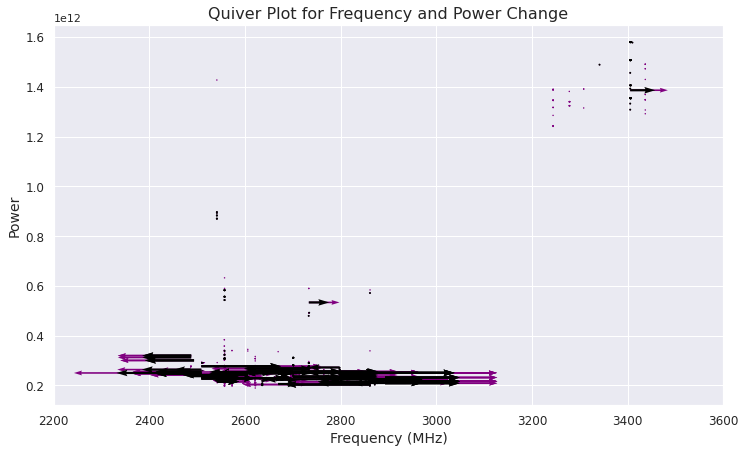

(336, 11)


In [166]:
# Creating arrow
x_position = drift_rates['Frequency 1']
y_position = drift_rates['Power 1']
x_direction = drift_rates['Frequency Difference']
y_direction = drift_rates['Power Difference']

x_position_1 = driftRates['Frequency 1']
y_position_1 = driftRates['Power 1']
x_direction_1 = driftRates['Frequency Difference']
y_direction_1 = driftRates['Power Difference']

# Creating plot
fig, ax = plt.subplots(figsize = (12, 7))

ax.quiver(x_position_1, y_position_1, x_direction_1, y_direction_1, color = 'purple')
ax.quiver(x_position, y_position, x_direction, y_direction, color = 'black')

#ax.quiver(x_pos[42:48], y_pos[42:48], x_direct[42:48], y_direct[42:48], color = 'yellow')

ax.set_title('Quiver Plot for Frequency and Power Change', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Frequency (MHz)', fontsize = 14)
plt.ylabel('Power', fontsize = 14)
plt.xlim(2200, 3600)
#plt.grid()

# Show plot
plt.show()
print(drift_rates.shape)

In [196]:
with open('../../Pickle_Files/shortlist_combos.pkl', 'rb') as f:
    short_list_hits = pickle.load(f)
print(short_list_hits.shape)
source_name = np.array(short_list_hits["Source Name"])
unique_source_name = np.unique(source_name)

(336, 15)


In [202]:
file_path_1 = list(np.array(short_list_hits["File Path 1"]))
file_path_2 = list(np.array(short_list_hits["File Path 2"]))

source_name = list(np.array(short_list_hits["Source Name"]))

frequency_1 = list(np.array(short_list_hits["Frequency 1"]))
frequency_2 = list(np.array(short_list_hits["Frequency 2"]))

beam_1 = list(np.array(short_list_hits["Beam 1"]))
beam_2 = list(np.array(short_list_hits["Beam 2"]))

compiled_df = pd.DataFrame({"File Path" : file_path_1 + file_path_2,
                            "Source Name" : source_name + source_name,
                            "Frequency" : frequency_1 + frequency_2,
                            "Beam" : beam_1 + beam_2})

short_list = compiled_df.drop_duplicates(ignore_index = True)

display(short_list)
mini_list = short_list[0:10]

with open('../../Pickle_Files/short_list_postage_stamps.pkl', 'wb') as f:  # open a text file
    pickle.dump(short_list, f) # serialize the list
f.close()

with open('../../Pickle_Files/mini_list_postage_stamps.pkl', 'wb') as f:  # open a text file
    pickle.dump(mini_list, f) # serialize the list
f.close()

,File Path,Source Name,Frequency,Beam
0,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,10132416262554752,2557.129913,4.0
1,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,10870562226350464,2541.792969,2.0
2,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,10870562226350464,2541.799904,2.0
3,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,10881183681076480,2557.129913,0.0
4,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,10889666240721024,2541.799904,0.0
...,...,...,...,...
292,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,37252450381467392,2508.767899,3.0
293,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,37252454678363520,2541.792984,4.0
294,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,37297397216456832,2541.792984,4.0
295,/mnt/cosmic-storage-1/data2/vlass_target/VLASS...,37300420873462016,2541.792984,1.0
